## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results,left_on="Mouse ID",right_on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
#Total number of Mouse ID's Listed
len(merged_df)

1893

In [3]:
#Drop duplicates for Mouse ID and Timepoint
drop_df = merged_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#Total number of Unique Mouse ID's
#Equal to total number of Mice
mice_df = drop_df.drop_duplicates(subset=["Mouse ID"],keep="last")
len(mice_df)

249

In [5]:
#Check to verify that the duplicates have been removed
mice_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = drop_df.groupby(by='Mouse ID', as_index=False).agg({'Timepoint': pd.Series.nunique})
duplicate_df

,Mouse ID,Timepoint
0,a203,10
1,a251,10
2,a262,10
3,a275,10
4,a366,7
...,...,...
244,z435,3
245,z578,10
246,z581,10
247,z795,10


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# This was done above
mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [8]:
# Checking the number of mice in the clean DataFrame.
len(mice_df)

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = drop_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_median = drop_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_var = drop_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_std = drop_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_sem = drop_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_stats_df = pd.DataFrame(data=
                               {"Tumor Vol Mean":drug_mean,
                                "Tumor Vol Median":drug_median,
                                "Tumor Vol Variance":drug_var,
                                "Tumor Vol Standard Deviation":drug_std,
                                "Tumor Vol SEM":drug_sem}).round(3)
drug_stats_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary = drop_df.groupby(["Drug Regimen"])
# This method produces everything in a single groupby function
drug_summary["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).round(3)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

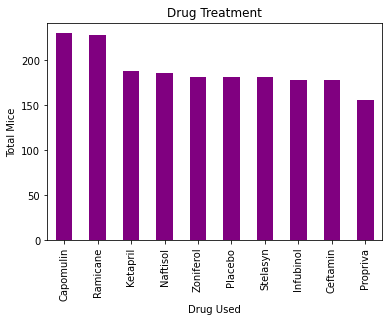

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_treatment = drop_df["Drug Regimen"].value_counts()

tt_bar = total_treatment.plot(kind = "bar",
                              title = "Drug Treatment", 
                              color = "purple")
tt_bar.set_xlabel("Drug Used")
tt_bar.set_ylabel("Total Mice")
plt.savefig("images/pandas_bar.png", bbox_inches = "tight")

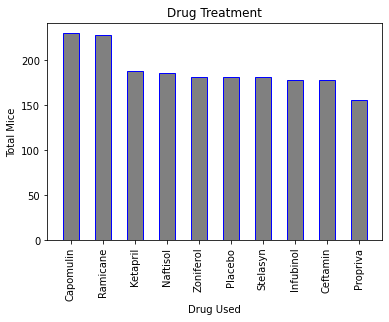

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
total_treatment = drop_df['Drug Regimen'].value_counts()

plt.bar(total_treatment.index.values, 
        total_treatment.values, 
        color ="gray", 
        edgecolor = "blue", 
        width = .5)

plt.title("Drug Treatment")
plt.xlabel("Drug Used")
plt.ylabel("Total Mice")
plt.xticks(rotation ="vertical")
plt.savefig("images/pyplot_bar.png", bbox_inches = "tight")
plt.show()

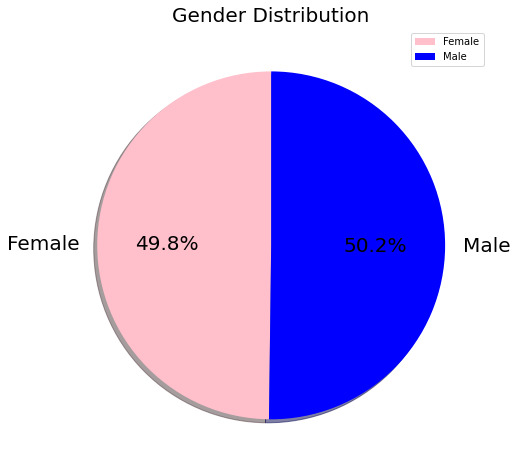

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mice_df.groupby('Sex')
gender_plot = pd.DataFrame(gender_df['Sex'].count())

colors = ['pink', 'blue']
gender_plot.plot(kind = 'pie',
                 y='Sex',
                 figsize=(12,8), 
                 colors = colors, 
                 startangle = 90,
                 shadow = True,
                 autopct="%1.1f%%",
                 fontsize = 20)

plt.title('Gender Distribution',fontsize = 20)
plt.ylabel('')

plt.savefig("images/pandas_gender.png", bbox_inches = "tight")
plt.show()

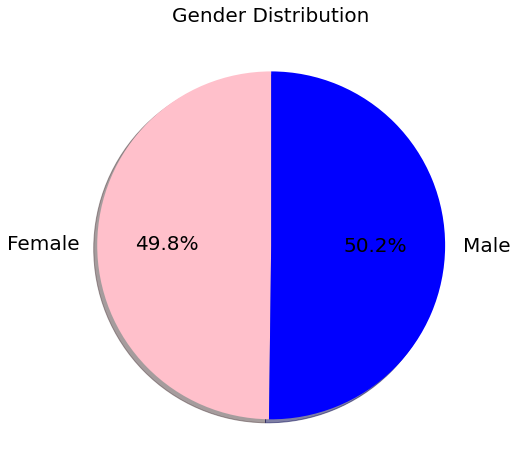

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot2 = gender_plot['Sex']

colors = ['pink', 'blue']
plot = gender_plot2.plot.pie(y='Sex',
                            figsize=(12,8), 
                            colors = colors, 
                            startangle = 90,
                            shadow = True,
                            autopct="%1.1f%%",
                            fontsize = 20)

plt.title('Gender Distribution',fontsize = 20)
plt.ylabel('')

plt.savefig("images/pyplot_gender.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_last = mice_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tp_merged = timepoint_last.merge(mice_df, on=['Mouse ID','Timepoint'], how="left")

tp_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors2 = tp_merged.loc[tp_merged['Drug Regimen'] == name, 'Tumor Volume (mm3)']
    
    # add subset 
    tumors.append(tumors2)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumors2.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    median = quartiles[0.5]
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumors2.loc[(tumors2 < lower_bound) | (tumors2 > upper_bound)]

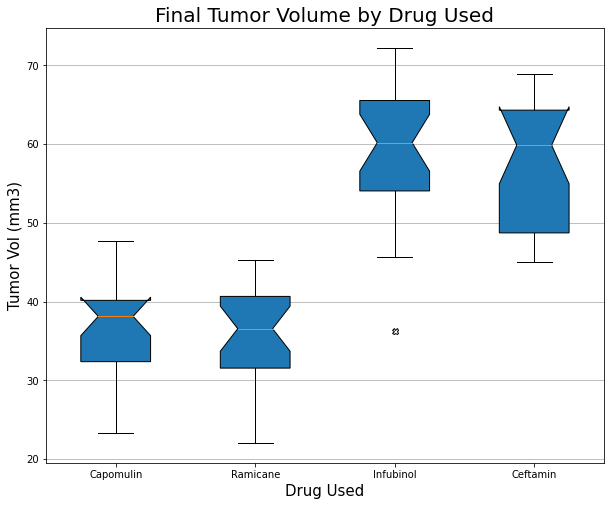

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(10,8))
ax.set_title('Final Tumor Volume by Drug Used', fontsize = 20)
ax.set_xlabel('Drug Used', fontsize = 15)
ax.set_ylabel('Tumor Vol (mm3)', fontsize = 15)
ax.yaxis.grid(True)
ax.boxplot(tumors,
           widths = 0.5,
           notch=True,
           vert = True,
           patch_artist = True,
           sym='X')
plt.xticks([1,2,3,4],treatments)
plt.savefig("images/boxplot.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

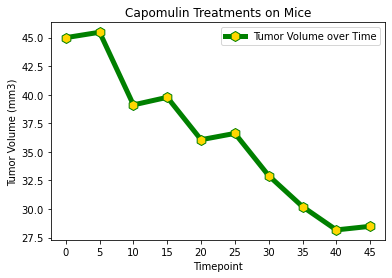

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = drop_df.loc[drop_df['Drug Regimen'] == 'Capomulin'].reset_index(drop=True)
capomulin2 = capomulin.loc[capomulin['Mouse ID'] == capomulin['Mouse ID'][12]]

plt.plot(capomulin2['Timepoint'], 
         capomulin2['Tumor Volume (mm3)'], 
         linewidth=5, 
         color ="green", 
         label = 'Tumor Volume over Time', 
         marker='h', 
         markerfacecolor='gold', 
         markeredgewidth=1,
         markersize=10, 
         markevery=1)
plt.xticks(capomulin2['Timepoint'])
plt.title('Capomulin Treatments on Mice')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')

plt.savefig('images/capomulin.png', dpi=100)

plt.show()


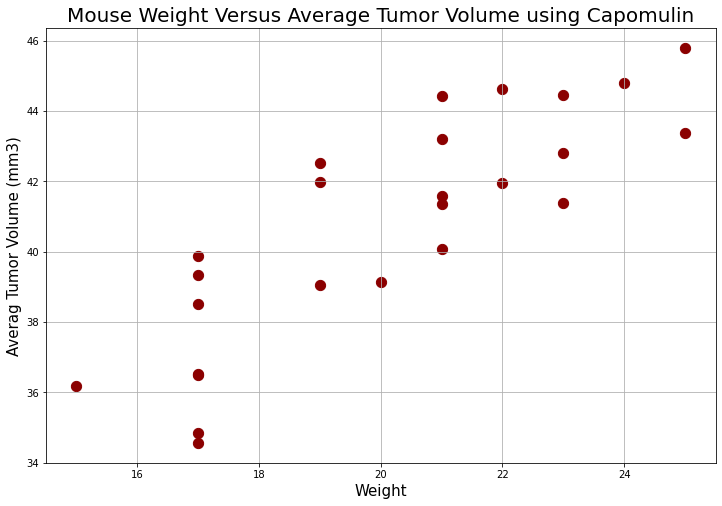

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(12, 8))
vol_weight = capomulin.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(vol_weight['Weight (g)'],
            vol_weight['Tumor Volume (mm3)'],
            s=105, 
            color="darkred")
plt.title('Mouse Weight Versus Average Tumor Volume using Capomulin',fontsize =20)
plt.xlabel('Weight',fontsize =15)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =15)
plt.grid()
plt.savefig("images/scatterplot.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

------------------------------------------------------------------------------------------------------------------
| The correlation between mouse weight and the average tumor volume on the Capomulin drug treatment is 0.84
------------------------------------------------------------------------------------------------------------------
| Slope:0.9544396890241045
------------------------------------------------------------------------------------------------------------------
| Intercept:21.552160532685015
------------------------------------------------------------------------------------------------------------------
| R-squared Value: 0.8419363424694718
------------------------------------------------------------------------------------------------------------------
| Correlation:0.84
------------------------------------------------------------------------------------------------------------------
| Standard Error:0.12754359033201337
--------------------------------------------------

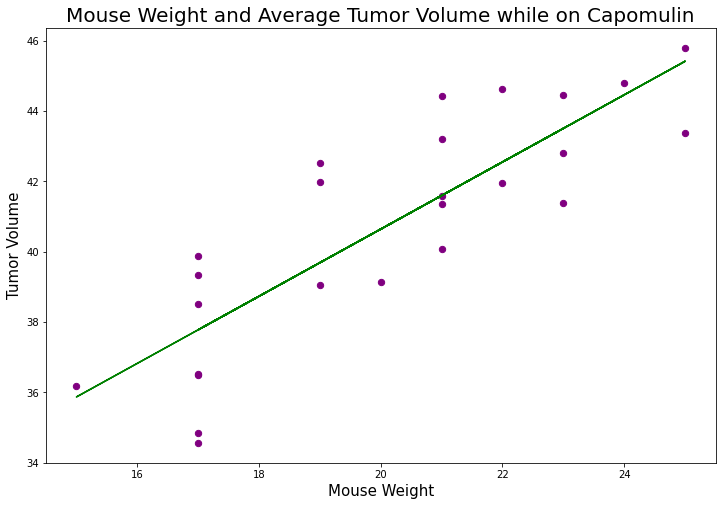

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].mean()
volume = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)

regress = weight * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
correlation = round(st.pearsonr(weight,volume)[0],2)

slope, int, r, p, std_err = st.linregress(weight, volume)
fit = slope * weight + int

print(f'------------------------------------------------------------------------------------------------------------------')
print(f'| The correlation between mouse weight and the average tumor volume on the Capomulin drug treatment is {correlation}')
print(f'------------------------------------------------------------------------------------------------------------------')
print(f"| Slope:{slope}")
print(f'------------------------------------------------------------------------------------------------------------------')
print(f"| Intercept:{intercept}")
print(f'------------------------------------------------------------------------------------------------------------------')
print(f"| R-squared Value: {rvalue}")
print(f'------------------------------------------------------------------------------------------------------------------')
print(f"| Correlation:{correlation}")
print(f'------------------------------------------------------------------------------------------------------------------')
print(f"| Standard Error:{stderr}")
print(f'------------------------------------------------------------------------------------------------------------------')

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(weight,
            volume, 
            s=40, 
            color="purple")
plt.plot(weight,regress,"g-")
plt.title("Mouse Weight and Average Tumor Volume while on Capomulin",fontsize =20)
plt.xlabel("Mouse Weight",fontsize =15)
plt.ylabel("Tumor Volume",fontsize =15)

plt.show()